In [9]:
library("ggplot2")
library(reshape)
require(utils)

In [10]:
results = read.csv("results.csv")

In [11]:
## Summarizes data.
## Gives count, mean, standard deviation, standard error of the mean, and confidence interval (default 95%).
##   data: a data frame.
##   measurevar: the name of a column that contains the variable to be summariezed
##   groupvars: a vector containing names of columns that contain grouping variables
##   na.rm: a boolean that indicates whether to ignore NA's
##   conf.interval: the percent range of the confidence interval (default is 95%)
summarySE <- function(data=NULL, measurevar, groupvars=NULL, na.rm=FALSE,
                      conf.interval=.95, .drop=TRUE) {
    library(plyr)

    # New version of length which can handle NA's: if na.rm==T, don't count them
    length2 <- function (x, na.rm=FALSE) {
        if (na.rm) sum(!is.na(x))
        else       length(x)
    }

    # This does the summary. For each group's data frame, return a vector with
    # N, mean, and sd
    datac <- ddply(data, groupvars, .drop=.drop,
      .fun = function(xx, col) {
        c(N    = length2(xx[[col]], na.rm=na.rm),
          mean = mean   (xx[[col]], na.rm=na.rm),
          sd   = sd     (xx[[col]], na.rm=na.rm)
        )
      },
      measurevar
    )

    # Rename the "mean" column    
    datac <- rename(datac, c("mean" = measurevar))

    datac$se <- datac$sd / sqrt(datac$N)  # Calculate standard error of the mean

    # Confidence interval multiplier for standard error
    # Calculate t-statistic for confidence interval: 
    # e.g., if conf.interval is .95, use .975 (above/below), and use df=N-1
    ciMult <- qt(conf.interval/2 + .5, datac$N-1)
    datac$ci <- datac$se * ciMult

    return(datac)
}

In [13]:
condition = (results$type == "blas") | (results$type == "better")
tgc = summarySE(results, measurevar="time", groupvars=c("type", "size"))
tgc

type,size,N,time,sd,se,ci
better,1,10,0.0000052,4.216370e-07,1.333333e-07,3.016210e-07
better,50,10,0.0017575,2.146132e-03,6.786666e-04,1.535251e-03
better,100,10,0.0230850,7.928470e-03,2.507202e-03,5.671686e-03
better,500,10,1.6838839,5.946372e-01,1.880408e-01,4.253778e-01
better,1000,10,12.5741224,4.899275e+00,1.549287e+00,3.504730e+00
better,1100,10,17.8753681,8.147657e+00,2.576515e+00,5.828483e+00
better,1200,10,23.8305315,5.229436e+00,1.653693e+00,3.740913e+00
better,1300,10,32.7109006,9.224926e+00,2.917178e+00,6.599114e+00
better,1400,10,40.0962123,6.301266e+00,1.992635e+00,4.507654e+00
better,1500,10,61.5730039,1.617896e+01,5.116237e+00,1.157373e+01


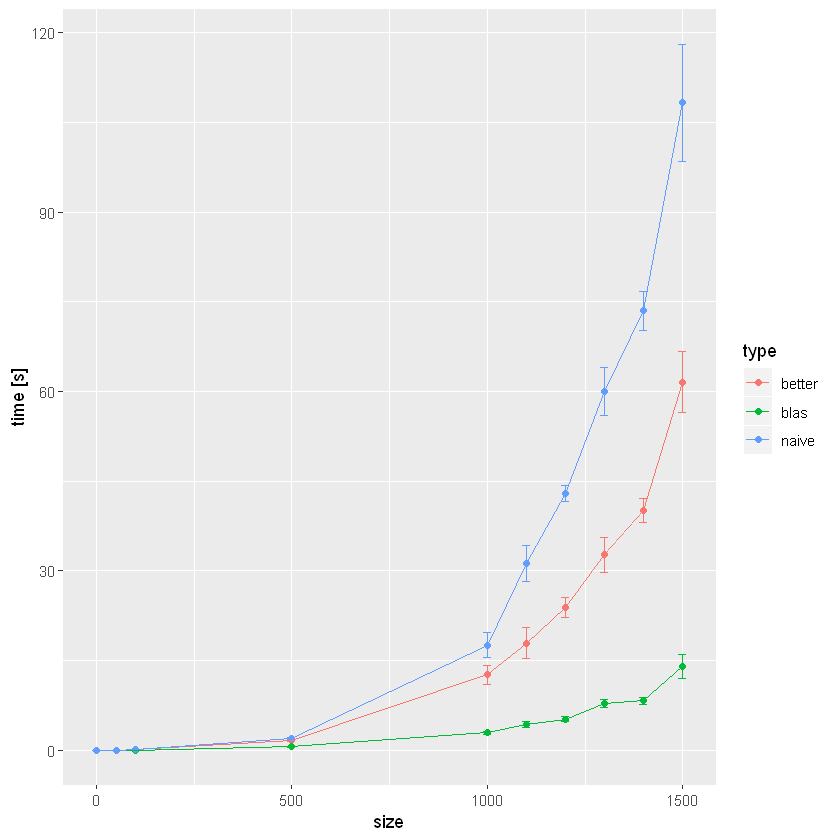

In [25]:
ggplot(tgc, aes(x=size, y=time, group=type, colour=type)) + geom_errorbar(aes(ymin=time-se, ymax=time+se), width=20) + geom_point() + geom_line() + ylab('time [s]') + xlab('size')

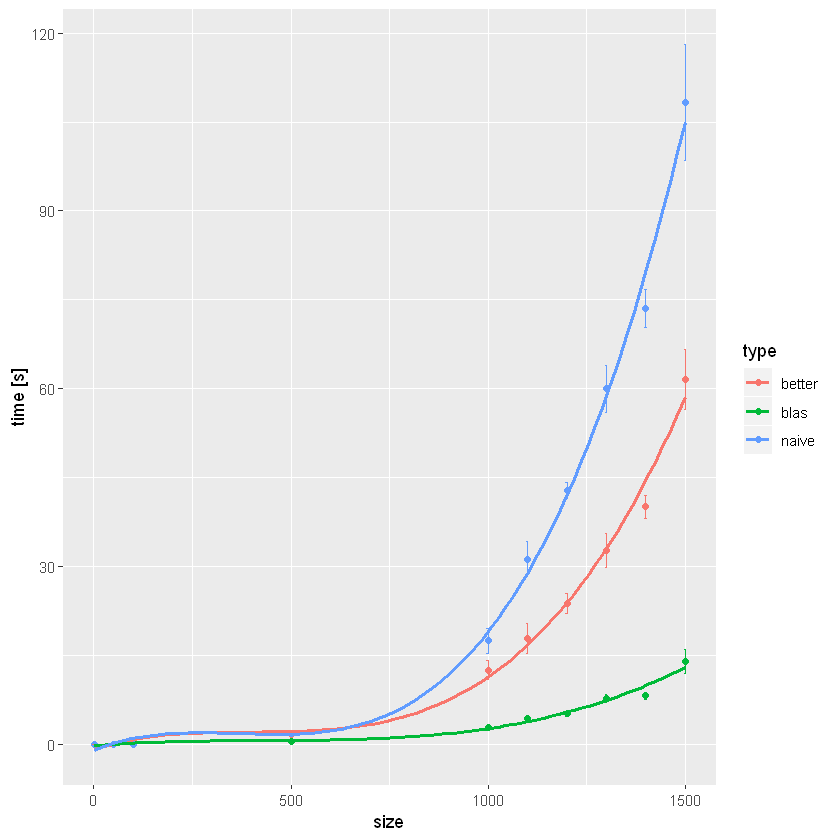

In [30]:
ggplot(data = tgc, aes(x=size, y=time, group=type, color=type)) + 
geom_point() +
geom_errorbar(aes(ymin=time-se, ymax=time+se), width=20, position=position_dodge(0.05)) +
stat_smooth(method='lm', formula=y~poly(x,3), se=FALSE) +
xlab('size') +
ylab('time [s]')